In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Primary storage info
account_name = 'calcuttaadlsgen2' # fill in your primary account name
container_name = 'yelp' # fill in your container name
relative_path_raw_json = 'raw_json' # fill in your relative folder path

adls_path_raw_json = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_raw_json)
print('Primary storage account path: ' + adls_path_raw_json)

relative_path_staging_csv = 'staging_csv' # fill in your relative folder path

adls_path_staging_csv = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_staging_csv)
print('Staging csv storage account path: ' + adls_path_staging_csv)

relative_path_staging_parquet = 'staging_parquet' # fill in your relative folder path

adls_path_staging_parquet = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_staging_parquet)
print('Staging parquet storage account path: ' + adls_path_staging_parquet)

relative_path_curated_csv = 'curated_csv' # fill in your relative folder path

adls_path_curated_csv = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_curated_csv)
print('Curated csv storage account path: ' + adls_path_curated_csv)

relative_path_curated_parquet = 'curated_parquet' # fill in your relative folder path

adls_path_curated_parquet = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_curated_parquet)
print('Curated parquet storage account path: ' + adls_path_curated_parquet)

StatementMeta(sparkpool, 32, 3, Finished, Available)

Primary storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/raw_json
Staging csv storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/staging_csv
Staging parquet storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/staging_parquet
Curated csv storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/curated_csv
Curated parquet storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/curated_parquet

In [4]:
#Read the tip.json data from staging 
from pyspark.sql.types import StructField, StructType, StringType,LongType, IntegerType,DateType
tip_file_csv_staging_path = adls_path_staging_csv + '/yelp_tips_csv'
#df_staging_tip_csv = spark.read.csv(tip_file_csv_staging_path, header = 'true')
custom_schem_tips_staging = StructType([
    StructField("business_id", StringType(), True, metadata={"desc": "string, 22 character business id, maps to business in business.json"}),
    StructField("compliment_count", IntegerType(), True, metadata={"desc": "integer, how many compliments it has"}),
    StructField("date", DateType(), True, metadata={"desc": "string, when the tip was written, formatted like YYYY-MM-DD HH:MI:SS"}),
    StructField("text", StringType(), True, metadata={"desc": "string, text of the tip"}),
    StructField("user_id", StringType(), True, metadata={"desc": "string, 22 character unique user id, maps to the user in user.json"})
])
df_staging_tip_csv = spark.read.format("csv") \
    .schema(custom_schem_tips_staging) \
    .option("header", True) \
    .load(tip_file_csv_staging_path)
print ("__________________Raw Schema__________________")
df_staging_tip_csv.printSchema()
print ("__________________Raw Count__________________\n")
print(df_staging_tip_csv.count())
print("\n")
print ("__________________Raw Sample__________________\n")
df_staging_tip_csv.show(5, truncate = False)

StatementMeta(sparkpool, 31, 6, Finished, Available)

__________________Raw Schema__________________
root
 |-- business_id: string (nullable = true)
 |-- compliment_count: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

__________________Raw Count__________________

1363162


__________________Raw Sample__________________

+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|business_id           |compliment_count|date      |text                                                                         |user_id               |
+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|UYX5zL_Xj9WEc_Wp-FrqHw|0               |2013-11-26|Here for a quick mtg                                                         |hf27xTME3EiCp6NL6VtWZQ|
|Ch3HkwQYv1YKw_FO06vBWA|0

In [6]:
#Write the tip file attaching the correct schema in csv format
tip_file_csv_curated_path = adls_path_curated_csv + '/yelp_tips_curated_csv'
#df_staging_tip_csv.coalesce(1).write.csv(tip_file_csv_curated_path, mode = 'overwrite', header = 'true')
#df_curated_tip_csv = spark.read.csv(tip_file_csv_curated_path, header = 'true')
df_curated_tip_csv = spark.read.format("csv") \
    .schema(custom_schem_tips_staging) \
    .option("header", True) \
    .load(tip_file_csv_curated_path)
print ("__________________Raw Schema__________________")
df_curated_tip_csv.printSchema()
print ("__________________Raw Count__________________\n")
print(df_curated_tip_csv.count())
print("\n")
print ("__________________Raw Sample__________________\n")
df_curated_tip_csv.show(5, truncate = False)

StatementMeta(sparkpool, 31, 8, Finished, Available)

__________________Raw Schema__________________
root
 |-- business_id: string (nullable = true)
 |-- compliment_count: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

__________________Raw Count__________________

1363162


__________________Raw Sample__________________

+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|business_id           |compliment_count|date      |text                                                                         |user_id               |
+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|UYX5zL_Xj9WEc_Wp-FrqHw|0               |2013-11-26|Here for a quick mtg                                                         |hf27xTME3EiCp6NL6VtWZQ|
|Ch3HkwQYv1YKw_FO06vBWA|0

In [16]:
df_curated_tip_csv.show(5, truncate = False)

StatementMeta(sparkpool, 31, 18, Finished, Available)

+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|business_id           |compliment_count|date      |text                                                                         |user_id               |
+----------------------+----------------+----------+-----------------------------------------------------------------------------+----------------------+
|UYX5zL_Xj9WEc_Wp-FrqHw|0               |2013-11-26|Here for a quick mtg                                                         |hf27xTME3EiCp6NL6VtWZQ|
|Ch3HkwQYv1YKw_FO06vBWA|0               |2014-06-15|Cucumber strawberry refresher                                                |uEvusDwoSymbJJ0auR3muQ|
|rDoT-MgxGRiYqCmi0bG10g|0               |2016-07-18|Very nice good service good food                                             |AY-laIws3S7YXNl_f_D6rQ|
|OHXnDV01gLokiX1ELaQufA|0               |2014-06-06|It's a small place. The 

In [17]:
#Test Code
import pyspark.sql.functions as F
from pyspark.sql.functions import *
#import sqlContext.implicits._
#import org.apache.spark.sql.functions._

checkin_file_csv_staging_path = adls_path_staging_csv + '/yelp_checkins_csv'
df_staging_checkin_csv = spark.read.csv(checkin_file_csv_staging_path, header = 'true')
#df_staging_checkin_csv.printSchema()
#print(df_staging_checkin_csv.head())
test_df  = df_staging_checkin_csv.withColumn("date",F.split(F.regexp_replace("date",'\s|:',","),",")) \
.withColumn("day", F.element_at("date",1).cast('date')) \
.withColumn("hour", F.element_at("date",2).cast('int')) \
.withColumn("min", F.element_at("date",3).cast('int')) \
.withColumn("weekday", F.date_format("day",'E')) \
.withColumn("second", F.element_at("date",4).cast('int')).drop("date")

print(test_df.printSchema())

print(test_df.head(10))

StatementMeta(sparkpool, 32, 19, Finished, Available)

root
 |-- business_id: string (nullable = true)
 |-- day: date (nullable = true)
 |-- hour: integer (nullable = true)
 |-- min: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- second: integer (nullable = true)

None
[Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2016, 4, 26), hour=19, min=49, weekday='Tue', second=16), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2016, 8, 30), hour=18, min=36, weekday='Tue', second=57), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2016, 10, 15), hour=2, min=45, weekday='Sat', second=18), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2016, 11, 18), hour=1, min=54, weekday='Fri', second=50), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2017, 4, 20), hour=18, min=39, weekday='Thu', second=6), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.date(2017, 5, 3), hour=17, min=58, weekday='Wed', second=2), Row(business_id='--1UhMGODdWsrMastO9DZw', day=datetime.d

In [18]:
#Read the checkin.json data in csv format
#Write the checkin file attaching the correct schema in csv format
checkin_file_csv_curated_path = adls_path_curated_csv + '/yelp_checkins_curated_csv'
#df_raw_checkin_json_exploded = df_raw_checkin_json.select("business_id",explode(split(col("date"), ",\s*")).alias("date"))
#df_raw_checkin_json_exploded.coalesce(4).write.csv(checkin_file_csv_staging_path, mode = 'overwrite', header = 'true')
df_staging_checkin_csv = spark.read.csv(checkin_file_csv_staging_path, header = 'true')
df_curated_checkin_csv = df_staging_checkin_csv.withColumn("date",F.split(F.regexp_replace("date",'\s|:',","),",")) \
.withColumn("day", F.element_at("date",1).cast('date')) \
.withColumn("hour", F.element_at("date",2).cast('int')) \
.withColumn("min", F.element_at("date",3).cast('int')) \
.withColumn("weekday", F.date_format("day",'E')) \
.withColumn("second", F.element_at("date",4).cast('int')).drop("date")
df_curated_checkin_csv.coalesce(7).write.csv(checkin_file_csv_curated_path, mode = 'overwrite', header = 'true')
print ("__________________Raw Schema__________________")
df_curated_checkin_csv.printSchema()
df_curated_checkin_csv = spark.read.csv(checkin_file_csv_curated_path, header = 'true')
print ("__________________Raw Count__________________\n")
print(df_curated_checkin_csv.count())
print("\n")
print ("__________________Raw Sample__________________\n")
#print(df_staging_checkin_csv.head(10))
df_curated_checkin_csv.show(5, truncate = False)

StatementMeta(sparkpool, 32, 20, Finished, Available)

__________________Raw Schema__________________
root
 |-- business_id: string (nullable = true)
 |-- day: date (nullable = true)
 |-- hour: integer (nullable = true)
 |-- min: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- second: integer (nullable = true)

__________________Raw Count__________________

21003777


__________________Raw Sample__________________

+----------------------+----------+----+---+-------+------+
|business_id           |day       |hour|min|weekday|second|
+----------------------+----------+----+---+-------+------+
|c7lAaz-pW58i1h1rSlyqcw|2015-04-28|3   |44 |Tue    |48    |
|c7lAaz-pW58i1h1rSlyqcw|2015-04-30|1   |20 |Thu    |55    |
|c7lAaz-pW58i1h1rSlyqcw|2015-04-30|2   |2  |Thu    |40    |
|c7lAaz-pW58i1h1rSlyqcw|2015-05-02|18  |39 |Sat    |25    |
|c7lAaz-pW58i1h1rSlyqcw|2015-05-05|3   |19 |Tue    |8     |
+----------------------+----------+----+---+-------+------+
only showing top 5 rows

StatementMeta(sparkpool, 32, 27, Finished, Available)

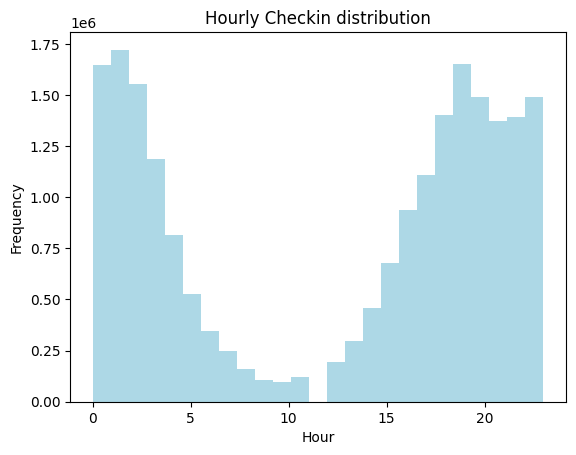

In [25]:
import matplotlib.pyplot as plt

#The charting package needs a Pandas dataframe or numpy array do the conversion
#pd_df_curated_checkin_csv = df_curated_checkin_csv.withColumn("hour",df_curated_checkin_csv["hour"].cast(IntegerType())).toPandas()

# Look at tips by amount count histogram
ax1 = pd_df_curated_checkin_csv['hour'].plot(kind='hist', bins=25, facecolor='lightblue')
ax1.set_title('Hourly Checkin distribution')
ax1.set_xlabel('Hour')
#ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

In [ ]:
#Test Code
import pyspark.sql.functions as F
df_staging_checkin_csv_test = spark.read.csv(checkin_file_csv_curated_path, header = 'true')
df_staging_checkin_csv_test.printSchema()
print(df_staging_checkin_csv_test.head())
test_df  = df_staging_checkin_csv.withColumn("date",F.split(F.regexp_replace("date",'\s|:',","),",")) \
.withColumn("day", F.element_at("date",1).cast('date')) \
.withColumn("hour", F.element_at("date",2).cast('int')) \
.withColumn("min", F.element_at("date",3).cast('int')) \
.withColumn("second", F.element_at("date",4).cast('int')).drop("date")
print(test_df.head())
print(test_df.printSchema())

In [6]:
df_curated_checkin_csv.createOrReplaceTempView('df_curated_checkin_csv')

StatementMeta(sparkpool, 32, 8, Finished, Available)

In [13]:
spark.sql("SELECT business_id, date_format(day, 'E') weekday, hour,COUNT(*) agg_checkins \
FROM df_curated_checkin_csv GROUP BY business_id,weekday,hour LIMIT 10").show()

StatementMeta(sparkpool, 32, 15, Finished, Available)

+--------------------+-------+----+------------+
|         business_id|weekday|hour|agg_checkins|
+--------------------+-------+----+------------+
|UkCVoAhBp-JUCYyld...|    Sat|   5|           1|
|UkFztgWFkut6fCmfN...|    Sat|  19|           5|
|UkTyUZud787wrcEBJ...|    Tue|  12|           1|
|UkWme3kwg6L9rd4tC...|    Wed|  23|          11|
|UkWme3kwg6L9rd4tC...|    Thu|  21|          10|
|UkWme3kwg6L9rd4tC...|    Sun|  21|           2|
|UkkIsIYoO0xF2Loys...|    Tue|  15|           1|
|UkkxWNEtCV0-RnJQq...|    Tue|  15|           1|
|UknttT8Gl8p7KpOSi...|    Fri|  11|           1|
|UkqdcwYv6_c-yW1JP...|    Mon|  19|          11|
+--------------------+-------+----+------------+